

# 3.02: Statistical Modeling and Model Validation


---

## Objective
The goal of this lab is to guide you through the modeling workflow. In this lesson, you will follow all best practices when slicing your data and validating your model. The goal of this lab is not necessarily to build the best model you can, but to build and evaluate a model, and interpret its results.

## Imports

In [383]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, cross_val_score

## Read Data
The `citibike` dataset consists of Citi Bike ridership data for over 224,000 rides in February 2014.

In [384]:
# Read in the citibike data in the data folder in this repository.
citibike= pd.read_csv('./data/citibike_feb2014.csv')

## Explore the data
Use this space to familiarize yourself with the data.

Convince yourself there are no issues with the data. If you find any issues, clean them here.

In [385]:
citibike.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,382,2014-02-01 00:00:00,2014-02-01 00:06:22,294,Washington Square E,40.730494,-73.995721,265,Stanton St & Chrystie St,40.722293,-73.991475,21101,Subscriber,1991,1
1,372,2014-02-01 00:00:03,2014-02-01 00:06:15,285,Broadway & E 14 St,40.734546,-73.990741,439,E 4 St & 2 Ave,40.726281,-73.989780,15456,Subscriber,1979,2
2,591,2014-02-01 00:00:09,2014-02-01 00:10:00,247,Perry St & Bleecker St,40.735354,-74.004831,251,Mott St & Prince St,40.723180,-73.994800,16281,Subscriber,1948,2
3,583,2014-02-01 00:00:32,2014-02-01 00:10:15,357,E 11 St & Broadway,40.732618,-73.991580,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,17400,Subscriber,1981,1
4,223,2014-02-01 00:00:41,2014-02-01 00:04:24,401,Allen St & Rivington St,40.720196,-73.989978,439,E 4 St & 2 Ave,40.726281,-73.989780,19341,Subscriber,1990,1


In [386]:
# To check the data type and nan values
citibike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224736 entries, 0 to 224735
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   tripduration             224736 non-null  int64  
 1   starttime                224736 non-null  object 
 2   stoptime                 224736 non-null  object 
 3   start station id         224736 non-null  int64  
 4   start station name       224736 non-null  object 
 5   start station latitude   224736 non-null  float64
 6   start station longitude  224736 non-null  float64
 7   end station id           224736 non-null  int64  
 8   end station name         224736 non-null  object 
 9   end station latitude     224736 non-null  float64
 10  end station longitude    224736 non-null  float64
 11  bikeid                   224736 non-null  int64  
 12  usertype                 224736 non-null  object 
 13  birth year               224736 non-null  object 
 14  gend

In [387]:
# There is no any nan value 
citibike.isnull().sum()

tripduration               0
starttime                  0
stoptime                   0
start station id           0
start station name         0
start station latitude     0
start station longitude    0
end station id             0
end station name           0
end station latitude       0
end station longitude      0
bikeid                     0
usertype                   0
birth year                 0
gender                     0
dtype: int64

In [388]:
citibike['gender'].unique

<bound method Series.unique of 0         1
1         2
2         2
3         1
4         1
         ..
224731    1
224732    2
224733    1
224734    1
224735    1
Name: gender, Length: 224736, dtype: int64>

In [389]:
# Statistical description summary of the data
citibike.describe().T

,count,mean,std,min,25%,50%,75%,max
tripduration,224736.0,874.519810,5486.092219,60.000000,360.000000,544.000000,845.000000,766108.000000
start station id,224736.0,439.203479,335.723861,72.000000,305.000000,403.000000,490.000000,3002.000000
start station latitude,224736.0,40.734366,0.019031,40.680342,40.721854,40.736197,40.749156,40.770513
start station longitude,224736.0,-73.990386,0.011853,-74.017134,-73.998522,-73.990617,-73.981918,-73.950048
end station id,224736.0,440.741995,341.497433,72.000000,305.000000,403.000000,488.000000,3002.000000
end station latitude,224736.0,40.734221,0.019048,40.680342,40.721816,40.735877,40.749013,40.770513
end station longitude,224736.0,-73.990521,0.011920,-74.017134,-73.999061,-73.990741,-73.981948,-73.950048
bikeid,224736.0,18010.598222,1987.769335,14529.000000,16302.000000,17975.000000,19689.000000,21542.000000
gender,224736.0,1.154617,0.436592,0.000000,1.000000,1.000000,1.000000,2.000000


In [390]:
#Remove false starts(less than 90 seconds) and also remove the same id in start station id and end station id

startingerror = citibike[(citibike['tripduration'] < 90) & (citibike['start station id'] == citibike['end station id'])].index

In [391]:
startingerror

Int64Index([    69,    406,    457,    917,   1183,   1622,   2995,   3154,
              4387,   4867,
            ...
            221385, 221879, 221952, 222339, 222844, 223474, 223622, 223706,
            224001, 224492],
           dtype='int64', length=637)

In [392]:
# Drop the values with have very long distance and errors in starting time.
citibike.drop(startingerror, inplace=True)

In [393]:
# Statistical description summary of the data. 
citibike.describe().T

,count,mean,std,min,25%,50%,75%,max
tripduration,224099.0,876.800066,5493.716839,61.000000,362.000000,546.000000,846.000000,766108.000000
start station id,224099.0,439.198015,335.743355,72.000000,305.000000,403.000000,490.000000,3002.000000
start station latitude,224099.0,40.734364,0.019030,40.680342,40.721854,40.736197,40.749156,40.770513
start station longitude,224099.0,-73.990385,0.011853,-74.017134,-73.998522,-73.990617,-73.981918,-73.950048
end station id,224099.0,440.740905,341.532883,72.000000,305.000000,403.000000,488.000000,3002.000000
end station latitude,224099.0,40.734218,0.019046,40.680342,40.721816,40.735877,40.749013,40.770513
end station longitude,224099.0,-73.990520,0.011921,-74.017134,-73.999061,-73.990741,-73.981948,-73.950048
bikeid,224099.0,18010.516517,1987.842555,14529.000000,16302.000000,17975.000000,19689.000000,21542.000000
gender,224099.0,1.154396,0.436388,0.000000,1.000000,1.000000,1.000000,2.000000


### Is average trip duration different by gender?

Conduct a hypothesis test that checks whether or not the average trip duration is different for `gender=1` and `gender=2`. Be sure to specify your null and alternative hypotheses, and to state your conclusion carefully and correctly!

In [394]:
# First let group the gender
groupedGender = citibike.groupby('gender');

In [395]:
# Look the count of the gender distribution in the dataframe 
count=groupedGender.size()
total = citibike.gender.count()
gender_perce= count*100/total
gender_perce

gender
0     2.993766
1    78.572863
2    18.433371
dtype: float64

In [396]:
# Answer: Yes the trip duration of each sex different as you see in the results in minutes
groupedGender['tripduration'].mean() / 60

gender
0    29.104971
1    13.598443
2    16.585756
Name: tripduration, dtype: float64

In [397]:
citibike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 224099 entries, 0 to 224735
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   tripduration             224099 non-null  int64  
 1   starttime                224099 non-null  object 
 2   stoptime                 224099 non-null  object 
 3   start station id         224099 non-null  int64  
 4   start station name       224099 non-null  object 
 5   start station latitude   224099 non-null  float64
 6   start station longitude  224099 non-null  float64
 7   end station id           224099 non-null  int64  
 8   end station name         224099 non-null  object 
 9   end station latitude     224099 non-null  float64
 10  end station longitude    224099 non-null  float64
 11  bikeid                   224099 non-null  int64  
 12  usertype                 224099 non-null  object 
 13  birth year               224099 non-null  object 
 14  gend

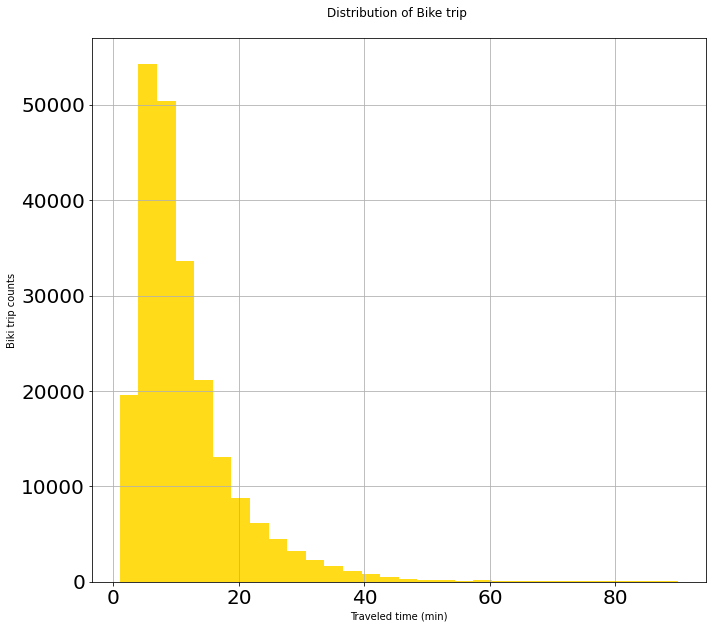

In [398]:
# Distribution of the biki trip within 1 and half hour 
time_mins = citibike.loc[(citibike.tripduration / 60 < 90)][['tripduration']]
time_mins = time_mins / 60 # assume the column data is in second and converted to minutes

time_mins.hist(figsize = (11,10), bins = 30, alpha = 0.9, color = 'gold') # plot of the travel duration
plt.tick_params(axis = 'both', which = 'major', labelsize = 20)
plt.title('Distribution of Bike trip \n')
plt.xlabel('Traveled time (min)')
plt.ylabel('Biki trip counts');
# The majorities of the biki returned between 10 and 20 minutes.

<function matplotlib.pyplot.show(close=None, block=None)>

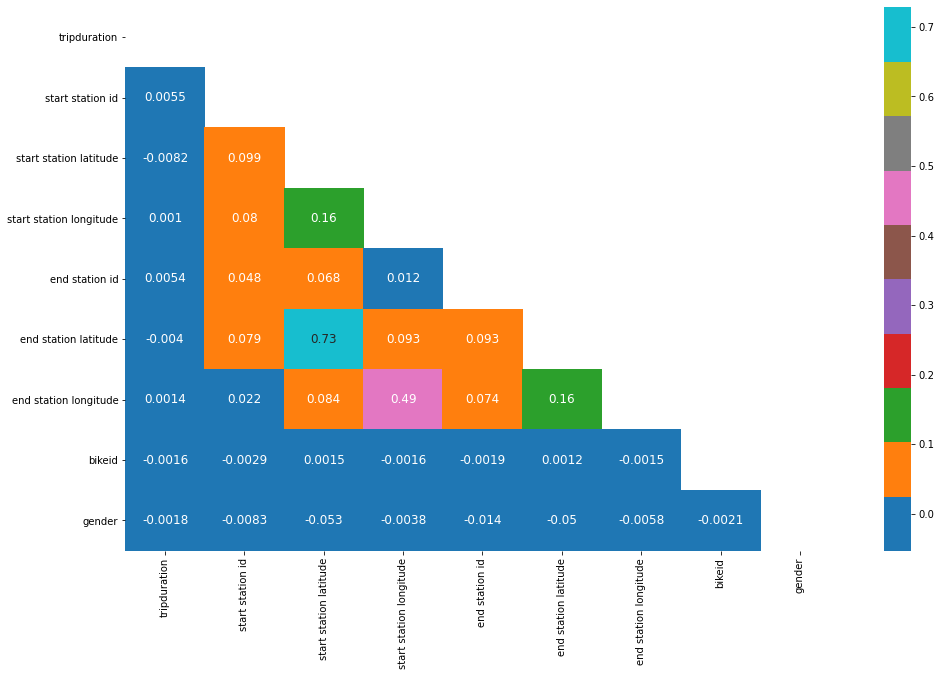

In [399]:
#Heatmap for navigating the data correlation to select features for linear regression modeling
plt.figure(figsize=(16,10))
mask = np.zeros_like(citibike.corr());
mask[np.triu_indices_from(mask)] = True; # hide the upper triangle of the graph
sns.heatmap(citibike.corr(), annot=True, mask=mask, annot_kws={'size': 12}, cmap="tab10")
plt.show

**Answer:** Geneder numeric column shouldn't be numeric column. Because it is not desriptive 

### Dummify the `start station id` Variable

In [400]:
citibike.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,382,2014-02-01 00:00:00,2014-02-01 00:06:22,294,Washington Square E,40.730494,-73.995721,265,Stanton St & Chrystie St,40.722293,-73.991475,21101,Subscriber,1991,1
1,372,2014-02-01 00:00:03,2014-02-01 00:06:15,285,Broadway & E 14 St,40.734546,-73.990741,439,E 4 St & 2 Ave,40.726281,-73.989780,15456,Subscriber,1979,2
2,591,2014-02-01 00:00:09,2014-02-01 00:10:00,247,Perry St & Bleecker St,40.735354,-74.004831,251,Mott St & Prince St,40.723180,-73.994800,16281,Subscriber,1948,2
3,583,2014-02-01 00:00:32,2014-02-01 00:10:15,357,E 11 St & Broadway,40.732618,-73.991580,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,17400,Subscriber,1981,1
4,223,2014-02-01 00:00:41,2014-02-01 00:04:24,401,Allen St & Rivington St,40.720196,-73.989978,439,E 4 St & 2 Ave,40.726281,-73.989780,19341,Subscriber,1990,1


In [401]:
# Dummify the "start station id" 
citibike = pd.get_dummies(citibike, columns=['start station id'])

## Feature Engineering
Engineer a feature called `age` that shares how old the person would have been in 2014 (at the time the data was collected)
- Note: you will need to clean the data a bit.

In [402]:
citibike['birth year'].unique # for checking the data series of birth year

<bound method Series.unique of 0         1991
1         1979
2         1948
3         1981
4         1990
          ... 
224731    1976
224732    1985
224733    1968
224734    1982
224735    1960
Name: birth year, Length: 224099, dtype: object>

In [403]:
# Check unique values in the birth year column
citibike['birth year'].unique()

array(['1991', '1979', '1948', '1981', '1990', '1978', '1944', '1983',
       '1969', '1986', '1962', '1965', '1942', '1989', '1980', '1957',
       '1951', '1992', '1971', '1982', '1968', '1984', '\\N', '1956',
       '1987', '1985', '1996', '1975', '1988', '1974', '1972', '1959',
       '1973', '1977', '1976', '1953', '1993', '1970', '1963', '1967',
       '1966', '1960', '1961', '1994', '1958', '1955', '1946', '1964',
       '1900', '1995', '1954', '1952', '1949', '1947', '1941', '1938',
       '1950', '1945', '1997', '1934', '1940', '1939', '1936', '1943',
       '1935', '1937', '1922', '1932', '1907', '1926', '1899', '1901',
       '1917', '1910', '1933', '1921', '1927', '1913'], dtype=object)

In [404]:
## There is '\\N' value  and need to be removed
citibike.drop(citibike.index[citibike['birth year']=='\\N'], inplace=True)

In [405]:
citibike['birth year'].isnull().sum() # no nan value

0

In [406]:
# Changing the object data type of birth year to float
citibike['birth year']= pd.to_numeric(citibike['birth year'],errors = 'coerce')

In [407]:
# Age calculation on 2014
now_year = 2014 #current year
citibike['age'] = now_year-citibike['birth year'] # age as of 2014.
citibike.head()

,tripduration,starttime,stoptime,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,...,start station id_2008,start station id_2009,start station id_2010,start station id_2012,start station id_2017,start station id_2021,start station id_2022,start station id_2023,start station id_3002,age
0,382,2014-02-01 00:00:00,2014-02-01 00:06:22,Washington Square E,40.730494,-73.995721,265,Stanton St & Chrystie St,40.722293,-73.991475,...,0,0,0,0,0,0,0,0,0,23
1,372,2014-02-01 00:00:03,2014-02-01 00:06:15,Broadway & E 14 St,40.734546,-73.990741,439,E 4 St & 2 Ave,40.726281,-73.989780,...,0,0,0,0,0,0,0,0,0,35
2,591,2014-02-01 00:00:09,2014-02-01 00:10:00,Perry St & Bleecker St,40.735354,-74.004831,251,Mott St & Prince St,40.723180,-73.994800,...,0,0,0,0,0,0,0,0,0,66
3,583,2014-02-01 00:00:32,2014-02-01 00:10:15,E 11 St & Broadway,40.732618,-73.991580,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,...,0,0,0,0,0,0,0,0,0,33
4,223,2014-02-01 00:00:41,2014-02-01 00:04:24,Allen St & Rivington St,40.720196,-73.989978,439,E 4 St & 2 Ave,40.726281,-73.989780,...,0,0,0,0,0,0,0,0,0,24


In [408]:
## usertype data is aslo object and need to be dummified so that it can be used in the model 

citibike= pd.get_dummies(citibike, columns=['usertype']) 

In [409]:
citibike.head()

,tripduration,starttime,stoptime,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,...,start station id_2009,start station id_2010,start station id_2012,start station id_2017,start station id_2021,start station id_2022,start station id_2023,start station id_3002,age,usertype_Subscriber
0,382,2014-02-01 00:00:00,2014-02-01 00:06:22,Washington Square E,40.730494,-73.995721,265,Stanton St & Chrystie St,40.722293,-73.991475,...,0,0,0,0,0,0,0,0,23,1
1,372,2014-02-01 00:00:03,2014-02-01 00:06:15,Broadway & E 14 St,40.734546,-73.990741,439,E 4 St & 2 Ave,40.726281,-73.989780,...,0,0,0,0,0,0,0,0,35,1
2,591,2014-02-01 00:00:09,2014-02-01 00:10:00,Perry St & Bleecker St,40.735354,-74.004831,251,Mott St & Prince St,40.723180,-73.994800,...,0,0,0,0,0,0,0,0,66,1
3,583,2014-02-01 00:00:32,2014-02-01 00:10:15,E 11 St & Broadway,40.732618,-73.991580,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,...,0,0,0,0,0,0,0,0,33,1
4,223,2014-02-01 00:00:41,2014-02-01 00:04:24,Allen St & Rivington St,40.720196,-73.989978,439,E 4 St & 2 Ave,40.726281,-73.989780,...,0,0,0,0,0,0,0,0,24,1


## Split your data into train/test sets

Look at the size of your data. What is a good proportion for your split? **Justify your answer, considering the size of your data and the default split size in sklearn.**

Use the `tripduration` column as your `y` variable.

For your `X` variables, use `age`, `usertype`, `gender`, and the dummy variables you created from `start station id`. (Hint: You may find the Pandas `.drop()` method helpful here.) 

In [410]:
citibike.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station name',
       'start station latitude', 'start station longitude', 'end station id',
       'end station name', 'end station latitude', 'end station longitude',
       ...
       'start station id_2009', 'start station id_2010',
       'start station id_2012', 'start station id_2017',
       'start station id_2021', 'start station id_2022',
       'start station id_2023', 'start station id_3002', 'age',
       'usertype_Subscriber'],
      dtype='object', length=344)

In [411]:
# Droping some of the columns that doesn't including in the features
citibike=citibike.drop(['starttime','stoptime','start station name','start station latitude','start station longitude',
                    'end station id','end station name','end station latitude','end station longitude','bikeid','birth year'], axis=1)
citibike.shape

(217404, 333)

In [412]:
y.shape # assigned y value data series

(217404,)

In [413]:
 # Asigning features for modeling 
features = ['age', 'usertype_Subscriber', 'gender','start station id_2022'] 
X = citibike[features]
y = citibike['tripduration'] 

In [414]:
# X values in the feature 
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 217404 entries, 0 to 224735
Data columns (total 4 columns):
 #   Column                 Non-Null Count   Dtype
---  ------                 --------------   -----
 0   age                    217404 non-null  int64
 1   usertype_Subscriber    217404 non-null  uint8
 2   gender                 217404 non-null  int64
 3   start station id_2022  217404 non-null  uint8
dtypes: int64(2), uint8(2)
memory usage: 5.4 MB


In [415]:
#Perform a split of our X and y
#train_test_split(X, y);

In [416]:
#Perform split of the train and test X and y
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 2000, train_size = 0.80)

## Fit a Linear Regression model in `sklearn` predicting `tripduration`.

In [417]:
# Instantiate the model
model = LinearRegression()

In [418]:
# Train the model with training data
model.fit(X_train,y_train)

LinearRegression()

In [419]:
# Predicting  tripduration with the test data

prediction= model.predict(X_test)

In [420]:
# fitting the model
model.fit(X, y)

LinearRegression()

## Evaluate your model
Look at some evaluation metrics for **both** the training and test data. 
- How did your model do? Is it overfit, underfit, or neither?
- Does this model outperform the baseline? (e.g. setting $\hat{y}$ to be the mean of our training `y` values.)

In [421]:
model.fit(X_train,y_train)
cross_val_score(model, X_train, y_train, cv = 4).mean()

0.00018933145577015864

In [422]:
cross_val_score(model, X_test, y_test, cv = 4).mean()

0.0003466808383285891

In [423]:
# calculate other metrics. The model is generally underfit since the train value lower than the test score.
# it needs to increase more features to move the fitting.
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 566.6463872250715
MSE: 20963070.00852588
RMSE: 4578.544529490336


## Fit a Linear Regression model in `statsmodels` predicting `tripduration`.

In [424]:
# Fit model
model.fit(X, y)

LinearRegression()

In [425]:
## build the OLS model
import statsmodels.api as sm
model = sm.OLS(y,X).fit()

In [426]:
# predict the tripduration (y) from the test data
prediction= model.predict(X_test)

## Evaluate your model
Using the `statsmodels` summary, test whether or not `age` has a significant effect when predicting `tripduration`.
- Be sure to specify your null and alternative hypotheses, and to state your conclusion carefully and correctly **in the context of your model**!

In [427]:
# Get metrics of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           tripduration   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     18.90
Date:                Thu, 08 Jul 2021   Prob (F-statistic):           3.00e-12
Time:                        19:34:36   Log-Likelihood:            -2.1804e+06
No. Observations:              217404   AIC:                         4.361e+06
Df Residuals:                  217400   BIC:                         4.361e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
age                       4.69

## Citi Bike is attempting to market to people who they think will ride their bike for a long time. Based on your modeling, what types of individuals should Citi Bike market toward?

In [428]:
# To make any conclusion based on the model developed needs more data to increase complexity. 
# With this model it is little to draw conclusions